In [2]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
sys.path.insert(0,'..')
from notebookFunctions import *
# from .. import notebookFunctions

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [124]:
data = pd.read_feather("/Users/weilu/Research/server/may_2018/03_week/all_data_folder/second_start_extended_combined_may19.feather")
data = data.reset_index(drop=True)
# data["BiasedEnergy"] = data["TotalE"] + 0.2*data["AMH_4H"]
data["BiasedEnergy"] = data["Lipid"] + data["Rg"] + data["Membrane"] + data["AMH-Go"] + 0.2*data["AMH_4H"]
data["BiasEnergy"] = 0.02 * (data["BiasTo"] - data["DisReal"])**2
data["Energy_with_all_bias"] = data["BiasEnergy"] + data["BiasedEnergy"]

In [ ]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/second_start_extended_combined_2/_280-350//"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 5), end=(28,20),save=False, xlabel="z_H6", ylabel="Qw", zmax=25,res=30)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location3 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location3, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

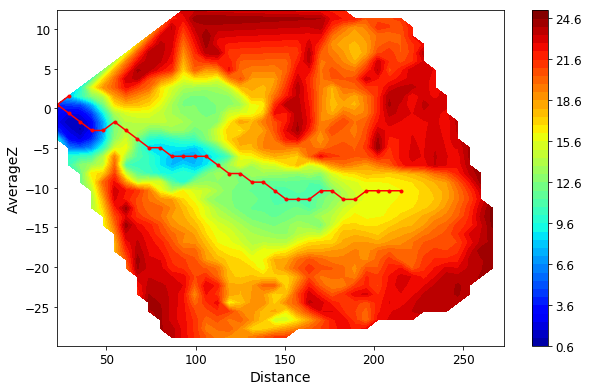

In [163]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/second_start_extended_combined_2/_280-350/2d_zAverage_dis/more_bins/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, start=(18, 30), end=(29,1),save=False, xlabel="Distance", ylabel="AverageZ", plot1d=False, zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

# 5-6 out region
## zoom to 50 - 130

(50, 120)

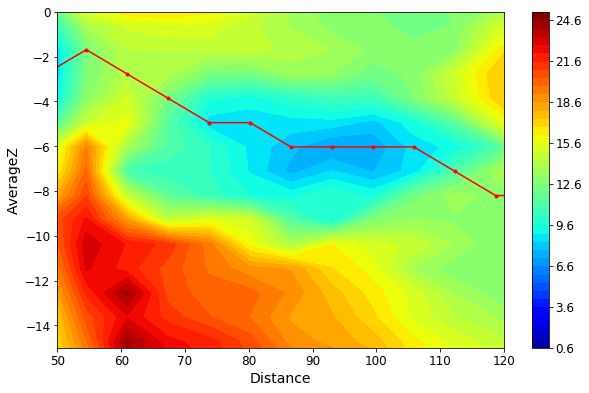

In [165]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/second_start_extended_combined_2/_280-350/2d_zAverage_dis/more_bins/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, start=(18, 30), end=(29,1),save=False, xlabel="Distance", ylabel="AverageZ", plot1d=False, zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)
plt.ylim(-15, 0)
plt.xlim(50, 120)
# plt.clim(0, 20)
# plt.colorbar()

In [193]:
t_pos = data.query("TempT == 373 and DisReal > 80 and DisReal < 100 and z_average > -8 and z_average < -4").reset_index(drop=True)
chosen = t_pos.query("Lipid1 < -0.5").sort_values("Energy_with_all_bias").head(n=20)
chosen.to_csv("/Users/weilu/Research/data/low_e_jun01_h56.csv")

In [197]:
t_pos.query("Lipid1 < -0.5").sort_values("Energy_with_all_bias").head(n=20)

,level_0,AMH,AMH-Go,AMH_3H,AMH_4H,BiasTo,DisReal,Dis_h56,Distance,Energy,...,z_average,z_h1,z_h2,z_h3,z_h4,z_h5,z_h6,BiasedEnergy,BiasEnergy,Energy_with_all_bias
7922,600066,-218.142307,-446.992027,-291.678962,-352.354453,94.0,93.045966,62.599341,-33.528161,-739.972991,...,-7.928949,-3.226523,-9.011228,-6.757330,-14.131343,-14.803465,-21.232008,-548.922365,0.018204,-548.904161
7921,600062,-212.394362,-443.980428,-286.857215,-349.705965,94.0,89.735826,62.417495,-38.614652,-761.752478,...,-6.611168,-2.650674,-6.301858,-6.033335,-9.673215,-10.093627,-20.069953,-544.805595,0.363664,-544.441931
9008,653790,-214.252021,-436.923250,-285.205326,-345.318451,92.0,82.772092,58.521394,69.845324,-737.297739,...,-4.478611,0.097867,-6.508623,-4.419184,-9.199424,-6.788752,-17.728036,-545.132696,1.703086,-543.429611
2077,240410,-220.312986,-437.590957,-290.558738,-346.437659,94.0,94.635741,65.483675,38.657025,-733.150749,...,-6.246558,-0.183788,-6.445593,-4.796985,-9.924937,-17.313959,-19.361403,-543.242774,0.008083,-543.234691
1049,28461,-210.956131,-441.325110,-279.734301,-341.120978,76.0,80.201087,62.110460,-32.345150,-746.558349,...,-7.025193,-3.172057,-7.528709,-4.070789,-9.033173,-12.842535,-25.990765,-543.154244,0.352983,-542.801261
2854,270713,-211.361449,-437.038069,-287.883144,-345.241391,98.0,97.091568,71.533853,-96.869755,-772.208512,...,-6.390107,-2.693870,-6.815748,-4.249246,-9.322100,-16.711451,-17.488690,-542.273375,0.016505,-542.256870
6716,446065,-212.398077,-440.203450,-284.330981,-344.442563,80.0,83.013829,67.293783,-82.875897,-711.944040,...,-5.828299,-1.815328,-5.904521,-4.346957,-10.804010,-6.916591,-20.667553,-541.813732,0.181663,-541.632068
6690,445885,-208.093119,-436.829162,-286.090277,-344.267325,80.0,81.883750,63.799134,-69.686281,-726.046091,...,-6.148379,-0.260000,-4.974692,-3.671368,-10.373978,-14.422206,-21.623450,-540.727587,0.070970,-540.656617
7776,563495,-208.908227,-437.178089,-282.820087,-343.123115,78.0,82.207193,69.044239,-80.949390,-753.426505,...,-5.874535,-1.388256,-6.618534,-3.846508,-8.456262,-12.426866,-21.845310,-540.876040,0.354010,-540.522030
8522,619536,-209.730173,-435.139497,-285.360462,-343.690619,104.0,96.789610,67.003272,95.343535,-735.130488,...,-6.596803,-1.326120,-7.209749,-4.823753,-8.103709,-19.455100,-21.162817,-540.816427,1.039794,-539.776632


## notice two caveats
1. At relative high temp(373), helix 6 is in the membrane half the time
2. helix 1 could be seperated from the rest 5 helix.

In [198]:
t_pos["chosen"] = (t_pos["Lipid1"] < -0.5) &(t_pos["z_h6"] < -10) & (t_pos["z_h3"] > -15)
a = t_pos["chosen"]
a.value_counts()

False    5743
True     4181
Name: chosen, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a43ed3e80>]], dtype=object)

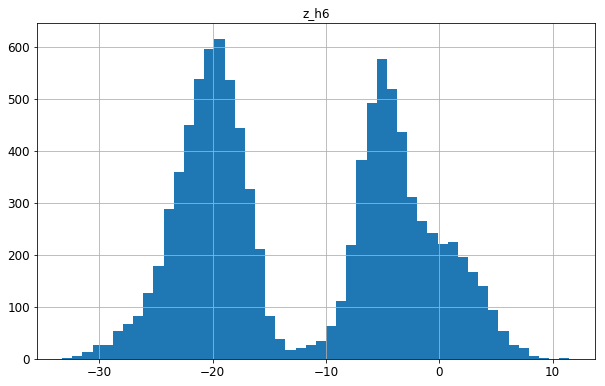

In [194]:
t_pos.hist("z_h6",bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a43f49a20>]], dtype=object)

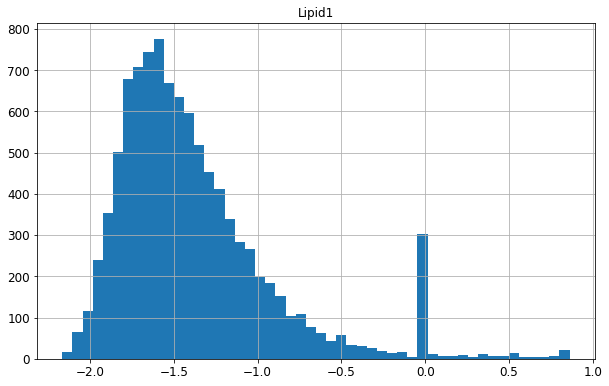

In [186]:
t_pos.hist("Lipid1",bins=50)

# 3-4 out region
## zoom to 120 - 200

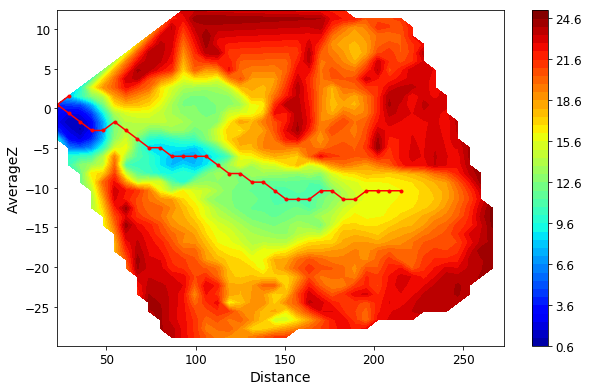

In [201]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/second_start_extended_combined_2/_280-350/2d_zAverage_dis/more_bins/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, start=(18, 30), end=(29,1),save=False, xlabel="Distance", ylabel="AverageZ", plot1d=False, zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)
# plt.ylim(-15, 0)
# plt.xlim(50, 120)

(120, 200)

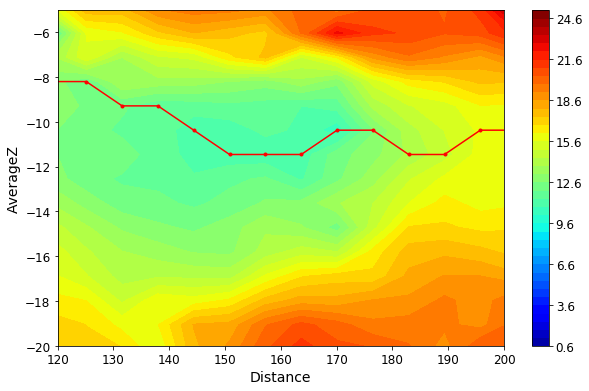

In [203]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/second_start_extended_combined_2/_280-350/2d_zAverage_dis/more_bins/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, start=(18, 30), end=(29,1),save=False, xlabel="Distance", ylabel="AverageZ", plot1d=False, zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)
plt.ylim(-20, -5)
plt.xlim(120, 200)

In [208]:
t_pos = data.query("TempT == 373 and DisReal > 140 and DisReal < 180 and z_average > -14 and z_average < -8").reset_index(drop=True)
chosen = t_pos.sort_values("Energy_with_all_bias").head(n=20)
chosen.to_csv("/Users/weilu/Research/data/low_e_jun01_h34.csv")

# Next, visible under high force
## zoom to 120 - 300

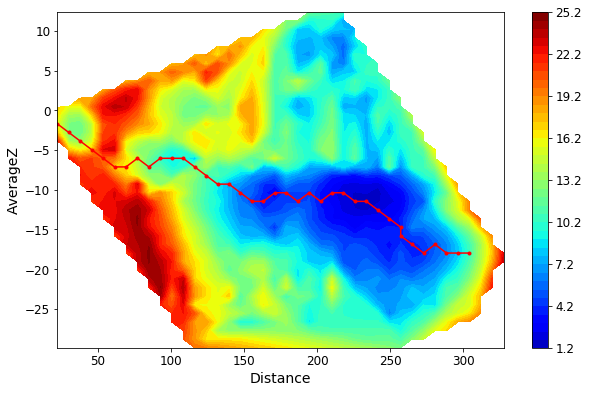

In [213]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/second_start_extended_combined_2/_280-350/2d_zAverage_dis/higer_force_0.2/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, title="high_force_AverageZ_Dis", start=(11, 36), end=(26,0),save=False, plot1d=False, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

(120, 300)

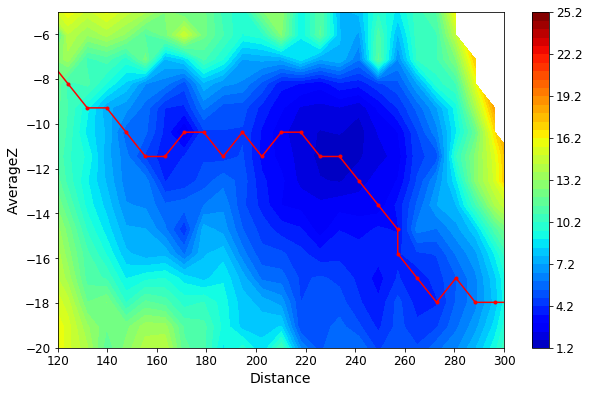

In [212]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/second_start_extended_combined_2/_280-350/2d_zAverage_dis/higer_force_0.2/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, title="high_force_AverageZ_Dis", start=(11, 36), end=(26,0),save=False, plot1d=False, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)
plt.ylim(-20, -5)
plt.xlim(120, 300)

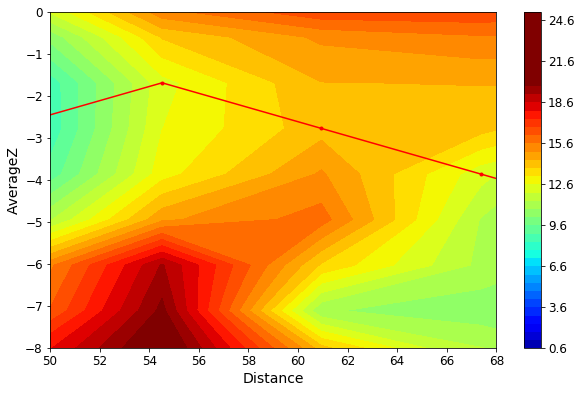

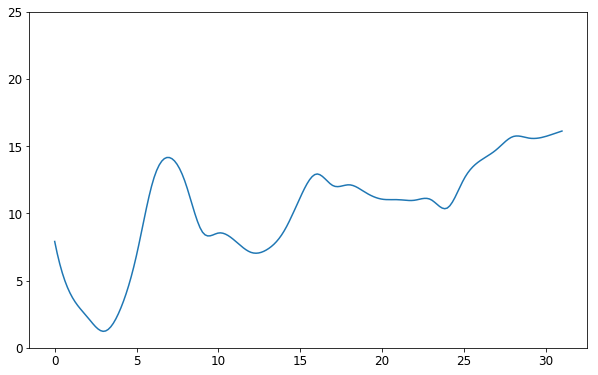

In [5]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/second_start_extended_combined_2/_280-350/2d_zAverage_dis/more_bins/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, start=(18, 30), end=(29,1),save=False, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

In [28]:
data.columns

Index(['level_0', 'AMH', 'AMH-Go', 'AMH_3H', 'AMH_4H', 'BiasTo', 'DisReal',
       'Dis_h56', 'Distance', 'Energy', 'Lipid', 'Lipid1', 'Lipid10',
       'Lipid11', 'Lipid12', 'Lipid13', 'Lipid14', 'Lipid15', 'Lipid2',
       'Lipid3', 'Lipid4', 'Lipid5', 'Lipid6', 'Lipid7', 'Lipid8', 'Lipid9',
       'Membrane', 'Qw', 'Rg', 'Run', 'Step', 'Temp', 'TempT', 'TotalE',
       'abs_z_average', 'index', 'rg1', 'rg2', 'rg3', 'rg4', 'rg5', 'rg6',
       'rg_all', 'z_average', 'z_h1', 'z_h2', 'z_h3', 'z_h4', 'z_h5', 'z_h6',
       'BiasedEnergy'],
      dtype='object')

In [ ]:
t = data.query("TempT == 373 and DisReal <56 and DisReal > 52")

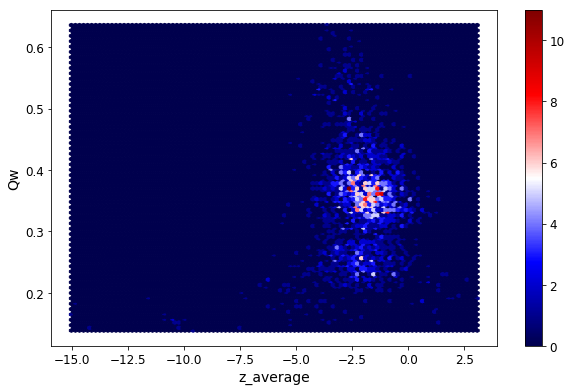

In [19]:
t.plot.hexbin("z_average", "Qw", cmap="seismic", sharex=False)

In [22]:
h1_out = t.query("Lipid1 > -0.5")

In [23]:
h1_out.shape

(1460, 51)

In [24]:
t.shape

(2070, 51)

In [25]:
h1_not_out =  t.query("Lipid1 <= -0.5")

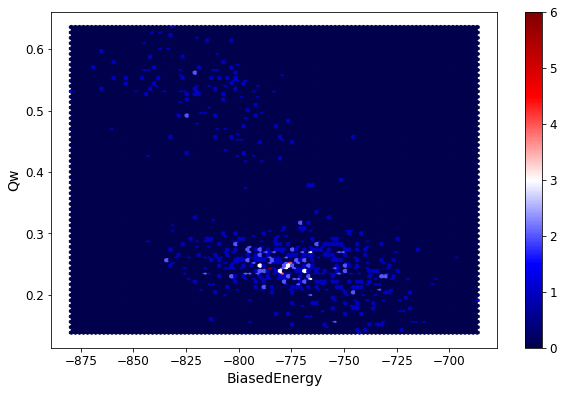

In [32]:
h1_not_out.plot.hexbin("BiasedEnergy", "Qw", cmap="seismic", sharex=False)

# according to this Qw vs Energy. we can seperate to two group. (high and low)

In [62]:
t_pre = data.query("TempT == 373 and DisReal <56 and DisReal > 52").reset_index(drop=True)
t_pre.sort_values("BiasedEnergy").head(n=10).to_csv("/Users/weilu/Research/data/may28_pre_lowE2.csv")

In [30]:
h1_not_out_high_q = h1_not_out.query("Qw > 0.4")

In [31]:
h1_not_out_high_q.shape

(114, 51)

In [ ]:
h1_not_out_high_q.to_csv("/Users/weilu/Research/data/may28_pre_highQ.csv")

In [34]:
h1_not_out_low_energy = h1_not_out.query("BiasedEnergy < -820")

In [35]:
h1_not_out_low_energy.to_csv("/Users/weilu/Research/data/may28_pre_lowE.csv")

In [36]:
h1_not_out_low_energy.shape

(66, 51)

In [55]:
chosen = data.query("TempT == 373 and DisReal <56 and DisReal > 52 and TotalE < -780").reset_index(drop=True)

In [57]:
chosen["withoutGo"] = chosen["TotalE"] - chosen["AMH-Go"]

In [59]:
chosen.columns

Index(['level_0', 'AMH', 'AMH-Go', 'AMH_3H', 'AMH_4H', 'BiasTo', 'DisReal',
       'Dis_h56', 'Distance', 'Energy', 'Lipid', 'Lipid1', 'Lipid10',
       'Lipid11', 'Lipid12', 'Lipid13', 'Lipid14', 'Lipid15', 'Lipid2',
       'Lipid3', 'Lipid4', 'Lipid5', 'Lipid6', 'Lipid7', 'Lipid8', 'Lipid9',
       'Membrane', 'Qw', 'Rg', 'Run', 'Step', 'Temp', 'TempT', 'TotalE',
       'abs_z_average', 'index', 'rg1', 'rg2', 'rg3', 'rg4', 'rg5', 'rg6',
       'rg_all', 'z_average', 'z_h1', 'z_h2', 'z_h3', 'z_h4', 'z_h5', 'z_h6',
       'BiasedEnergy', 'withoutGo'],
      dtype='object')

## lipid1 out is energetically similar

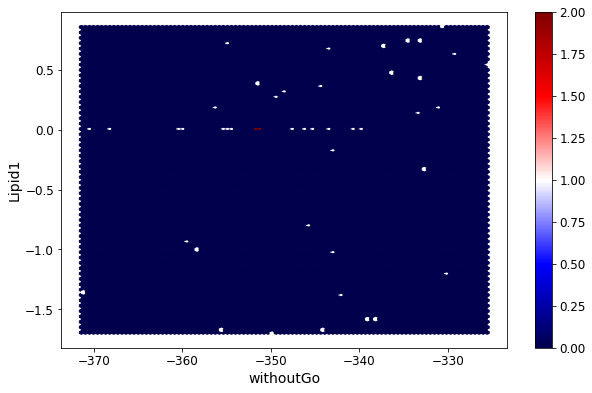

In [58]:
chosen.plot.hexbin("withoutGo", "Lipid1", cmap="seismic", sharex=False)

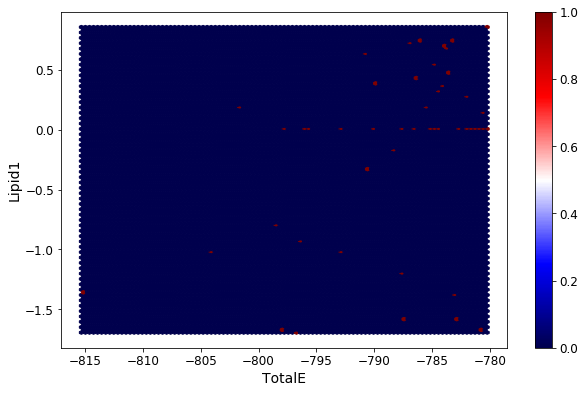

In [53]:
data.query("TempT == 373 and DisReal <56 and DisReal > 52 and TotalE < -780").plot.hexbin("TotalE", "Lipid1", cmap="seismic", sharex=False)

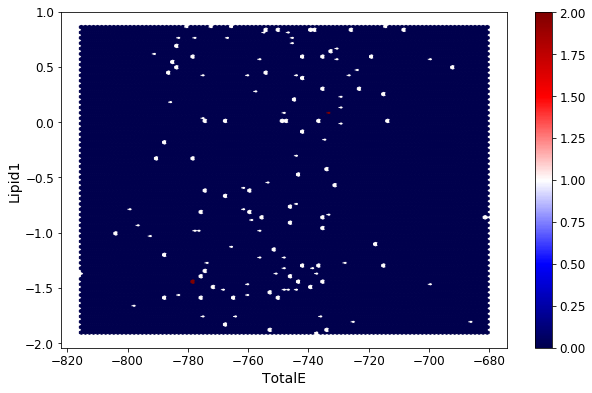

In [52]:
data.query("TempT == 373 and DisReal <56 and DisReal > 52 and AMH_4H < -320").plot.hexbin("TotalE", "Lipid1", cmap="seismic", sharex=False)

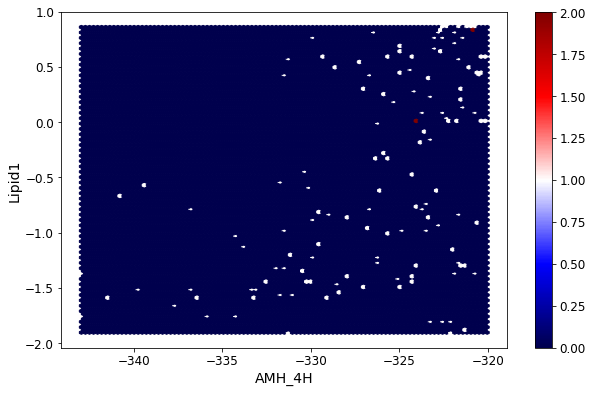

In [51]:
data.query("TempT == 373 and DisReal <56 and DisReal > 52 and AMH_4H < -320").plot.hexbin("AMH_4H", "Lipid1", cmap="seismic", sharex=False)

In [46]:
data.query("TempT == 373 and DisReal <56 and DisReal > 52 and BiasedEnergy < -850").to_csv("/Users/weilu/Research/data/may28_pre_lowE2.csv")

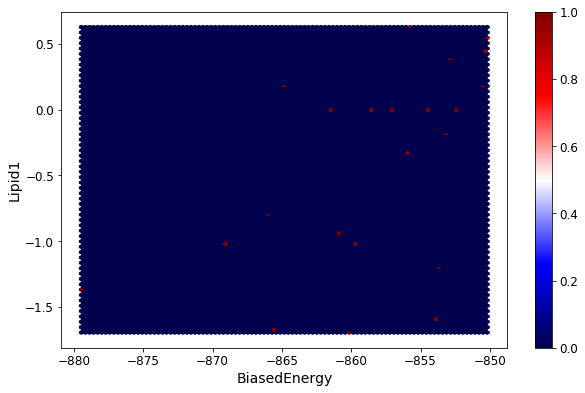

In [47]:
data.query("TempT == 373 and DisReal <56 and DisReal > 52 and BiasedEnergy < -850").plot.hexbin("BiasedEnergy", "Lipid1", cmap="seismic", sharex=False)

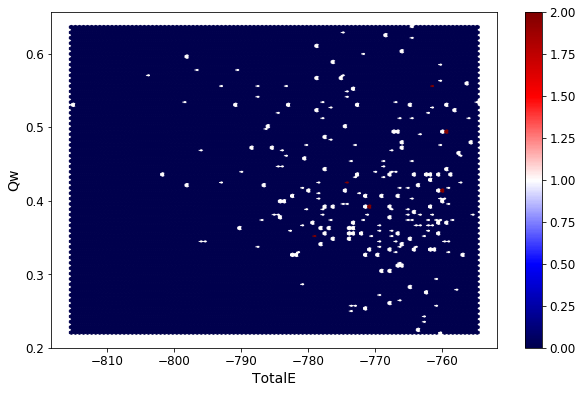

In [40]:
data.query("TempT == 373 and DisReal <56 and DisReal > 52 and BiasedEnergy < -820").plot.hexbin("TotalE", "Qw", cmap="seismic", sharex=False)

# Middle part

In [75]:
data.columns

Index(['level_0', 'AMH', 'AMH-Go', 'AMH_3H', 'AMH_4H', 'BiasTo', 'DisReal',
       'Dis_h56', 'Distance', 'Energy', 'Lipid', 'Lipid1', 'Lipid10',
       'Lipid11', 'Lipid12', 'Lipid13', 'Lipid14', 'Lipid15', 'Lipid2',
       'Lipid3', 'Lipid4', 'Lipid5', 'Lipid6', 'Lipid7', 'Lipid8', 'Lipid9',
       'Membrane', 'Qw', 'Rg', 'Run', 'Step', 'Temp', 'TempT', 'TotalE',
       'abs_z_average', 'index', 'rg1', 'rg2', 'rg3', 'rg4', 'rg5', 'rg6',
       'rg_all', 'z_average', 'z_h1', 'z_h2', 'z_h3', 'z_h4', 'z_h5', 'z_h6',
       'BiasedEnergy'],
      dtype='object')

In [ ]:
t_middle = data.query("TempT == 373 and DisReal <64 and DisReal > 56")

In [82]:
t_middle.sort_values("Energy_with_all_bias").head(n=10)

968976     0.002038
987300     0.484228
862553     0.002067
817889     0.002087
987200     0.619495
1340261    0.393771
1348542    0.002085
861733     0.002075
818114     0.690917
960362     0.002076
Name: Lipid1, dtype: float64

In [84]:
t_middle.sort_values("Energy_with_all_bias").head(n=10)

,level_0,AMH,AMH-Go,AMH_3H,AMH_4H,BiasTo,DisReal,Dis_h56,Distance,Energy,...,z_average,z_h1,z_h2,z_h3,z_h4,z_h5,z_h6,BiasedEnergy,BiasEnergy,Energy_with_all_bias
968976,288976,-185.150523,-452.855140,-255.166642,-314.562816,68.0,62.760565,24.956958,-21.646766,-817.007286,...,-1.011145,-0.561827,-10.006342,-3.576899,-7.729485,-2.628495,-3.042307,-891.943372,0.549034,-891.394338
987300,307300,-191.477959,-462.454677,-266.727788,-328.154309,64.0,63.107126,26.771274,29.612238,-813.296817,...,-1.100404,1.740113,-7.581102,-0.008847,-8.402791,-6.478215,-3.044261,-890.086085,0.015944,-890.070141
862553,182553,-177.932338,-445.751715,-249.383109,-310.686959,60.0,57.244524,22.712414,12.335953,-808.602263,...,-1.790858,2.368893,-8.777372,-2.267988,-8.486011,-7.601503,-3.794057,-883.633192,0.151853,-883.481339
817889,137889,-187.600558,-433.647181,-252.892214,-306.058929,62.0,59.070395,27.794529,-56.709284,-807.070217,...,0.011100,1.474549,-4.677597,-3.736879,-6.626902,-2.519906,-4.405690,-879.482537,0.171652,-879.310885
987200,307200,-187.627924,-448.626452,-258.117104,-318.333319,64.0,61.600435,26.826586,9.301599,-801.503674,...,-2.033945,-0.423518,-7.824309,-3.283775,-9.585157,-6.004256,-5.084711,-876.776931,0.115158,-876.661772
1340261,660261,-193.476936,-453.977439,-262.047565,-326.592460,64.0,63.735667,25.762269,-63.592103,-797.027768,...,-3.856957,-1.527055,-8.141128,-4.659882,-10.594385,-8.724989,-4.978763,-871.576904,0.001397,-871.575507
1348542,668542,-182.890138,-424.305940,-244.947614,-299.861460,64.0,60.263618,24.438730,59.882642,-799.074728,...,-0.974776,2.166633,-6.337763,-4.073608,-9.451097,-3.074651,-6.681425,-870.817154,0.279211,-870.537943
861733,181733,-182.906244,-442.675172,-250.206101,-309.693097,60.0,58.086352,27.439114,-22.834862,-794.993919,...,-3.361718,-1.036232,-8.213383,-6.630186,-9.495162,-4.368721,-6.002130,-867.992943,0.073241,-867.919702
818114,138114,-185.156753,-445.076764,-257.262259,-319.596854,62.0,56.352389,25.842610,36.796611,-795.365808,...,-2.127698,-1.366890,-8.337652,-0.969612,-10.005213,-5.915076,-4.852799,-868.529782,0.637910,-867.891872
960362,280362,-185.383967,-443.292820,-257.209624,-312.033323,68.0,61.723127,22.775846,-40.973911,-793.124810,...,-0.403986,2.174375,-8.155180,0.536708,-6.893027,-6.565490,-1.551007,-867.347392,0.787983,-866.559410


In [83]:
t_middle.query("Lipid1 < -0.5").sort_values("Energy_with_all_bias").head(n=10)

,level_0,AMH,AMH-Go,AMH_3H,AMH_4H,BiasTo,DisReal,Dis_h56,Distance,Energy,...,z_average,z_h1,z_h2,z_h3,z_h4,z_h5,z_h6,BiasedEnergy,BiasEnergy,Energy_with_all_bias
701186,21186,-209.133908,-418.951106,-270.329612,-313.703091,76.0,62.014634,25.631543,59.764704,-795.730168,...,-2.723255,-4.000245,-7.756103,-8.994198,-5.593929,-0.685517,-3.082913,-864.700700,3.911809,-860.788891
904080,224080,-213.655212,-423.941326,-272.243852,-318.180096,66.0,60.718511,24.335414,60.465456,-787.438196,...,-3.716866,-1.914587,-9.157983,-5.587579,-7.893231,-2.351856,-1.651036,-856.196257,0.557883,-855.638375
1267493,587493,-197.666069,-409.827156,-259.923175,-301.627741,66.0,61.820953,21.048411,59.039681,-785.420694,...,0.116077,-0.864105,-6.006079,-3.170596,-6.960827,-2.538990,-2.241102,-852.035309,0.349289,-851.686021
1269092,589092,-198.248522,-403.671063,-256.030194,-296.299067,66.0,60.412923,22.405400,-54.367456,-784.194851,...,-5.039440,1.112002,-7.104066,-20.386384,-10.007655,-6.785298,-4.197061,-849.353453,0.624309,-848.729144
1261253,581253,-201.116930,-413.832648,-258.702356,-304.689194,66.0,61.414392,26.005718,13.321524,-780.344135,...,-2.961339,-2.644498,-9.656189,-12.192673,-6.613459,-0.593869,-0.676587,-848.976545,0.420556,-848.555989
906069,226069,-203.865362,-414.742325,-264.843559,-309.038487,66.0,60.759228,25.615073,23.097784,-778.462800,...,-2.984441,-3.419661,-9.565722,-8.099691,-8.470239,-6.105927,-4.251687,-847.279984,0.549314,-846.730670
901220,221220,-200.730946,-410.319419,-261.402907,-306.431810,66.0,61.064203,18.522741,55.609889,-775.898991,...,-2.732144,-4.542499,-7.893796,-5.047760,-9.848075,-1.950217,-6.329883,-845.157923,0.487242,-844.670681
1268781,588781,-193.717584,-413.213506,-255.746521,-300.545073,66.0,57.706235,25.848698,-26.947205,-774.013570,...,-1.580429,-1.522628,-8.591993,-5.867868,-7.853529,-3.782479,-2.911377,-841.701263,1.375731,-840.325533
1269789,589789,-198.723167,-418.898969,-262.766255,-310.140125,66.0,58.114019,22.732688,-49.795578,-773.186298,...,-1.438265,-1.323346,-6.461957,-8.688956,-8.747420,-1.896451,-3.515479,-841.465646,1.243774,-840.221872
1267353,587353,-211.698489,-419.647987,-274.232408,-314.965327,66.0,62.623772,22.023728,61.549801,-769.182771,...,-2.006364,-1.901208,-7.703248,-6.128692,-5.920078,-2.112978,-2.154064,-840.199936,0.227978,-839.971958


In [ ]:
# t_pre = data.query("TempT == 373 and DisReal <56 and DisReal > 52").reset_index(drop=True)
# t_pre.sort_values("BiasedEnergy").head(n=10).to_csv("/Users/weilu/Research/data/may28_pre_lowE2.csv")

In [68]:
t_middle.sort_values("BiasedEnergy").head(n=10)["Lipid1"]

968976     0.002038
987300     0.484228
862553     0.002067
817889     0.002087
987200     0.619495
1340261    0.393771
1348542    0.002085
818114     0.690917
861733     0.002075
960362     0.002076
Name: Lipid1, dtype: float64

In [38]:
t_middle.shape

(11303, 51)

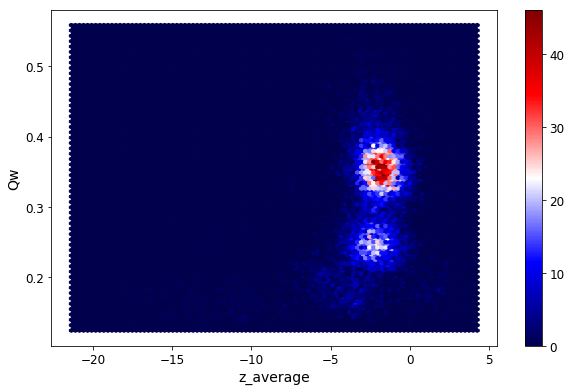

In [39]:
t_middle.plot.hexbin("z_average", "Qw", cmap="seismic", sharex=False)

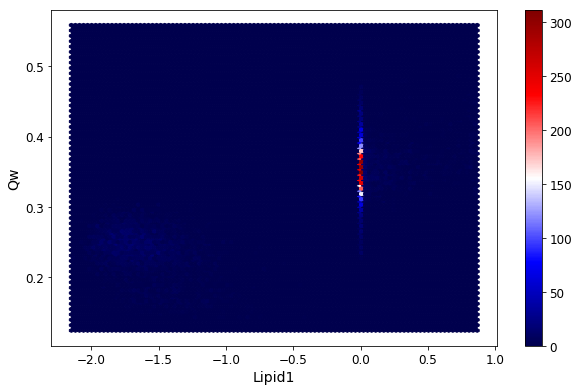

In [45]:
t_middle.plot.hexbin("Lipid1", "Qw", cmap="seismic", sharex=False)

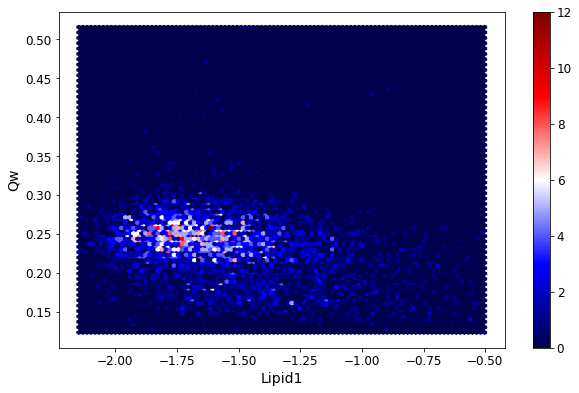

In [91]:
t_middle.query("Lipid1 < -0.5").plot.hexbin("Lipid1", "Qw", cmap="seismic", sharex=False)

# Post part

In [136]:
t_pos = data.query("TempT == 373 and DisReal > 64 and DisReal < 70")

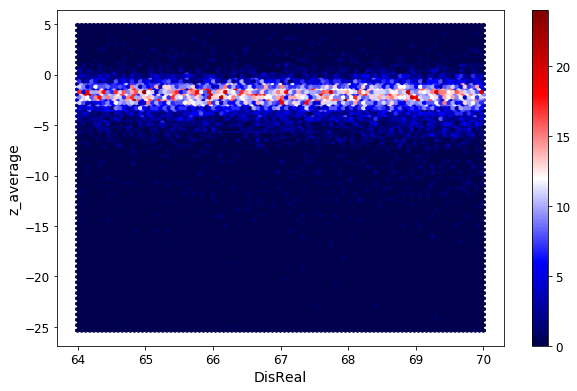

In [137]:
t_pos.plot.hexbin("DisReal", "z_average", cmap="seismic", sharex=False)

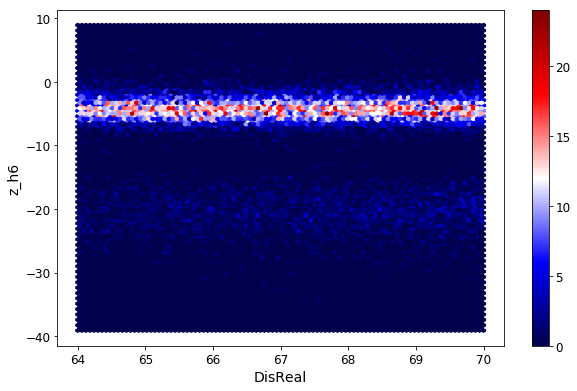

In [145]:
t_pos.plot.hexbin("DisReal", "z_h6", cmap="seismic", sharex=False)

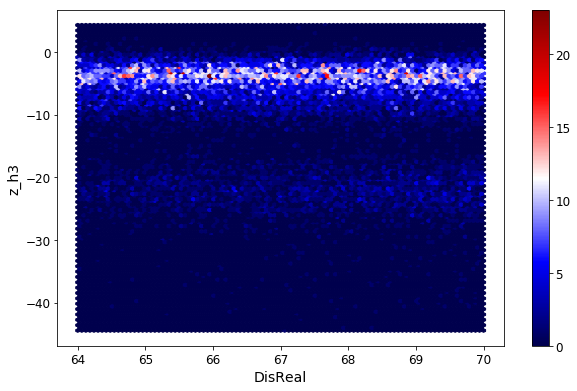

In [151]:
t_pos.plot.hexbin("DisReal", "z_h3", cmap="seismic", sharex=False)

In [152]:
t_pos = data.query("TempT == 373 and DisReal > 64 and DisReal < 70").reset_index(drop=True)
t_pos["chosen"] = (t_pos["Lipid1"] < -0.5) &(t_pos["z_h6"] < -10) & (t_pos["z_h3"] > -15)

a = t_pos["chosen"]
a.value_counts()

In [158]:
t_pos.groupby("chosen").mean()

,level_0,AMH,AMH-Go,AMH_3H,AMH_4H,BiasTo,DisReal,Dis_h56,Distance,Energy,...,z_average,z_h1,z_h2,z_h3,z_h4,z_h5,z_h6,BiasedEnergy,BiasEnergy,Energy_with_all_bias
chosen,,,,,,,,,,,,,,,,,,,,,
False,349854.403006,-185.296016,-411.394756,-247.143209,-298.450955,70.665836,67.084624,26.229786,1.054884,-709.251579,...,-2.600236,-0.767343,-7.674342,-7.848627,-8.184398,-5.089119,-5.934283,-510.509885,0.868006,-509.641879
True,282352.453920,-197.144026,-392.655104,-260.105525,-306.311400,74.605227,67.432956,48.774796,8.319537,-693.805555,...,-1.844080,-1.313915,-7.404818,-5.608807,8.525941,-2.816140,-20.574323,-490.153804,1.524713,-488.629091


False    13640
True       727
Name: chosen, dtype: int64

In [154]:
t_pos["chosen"].count()

14367

In [ ]:
t_pos.plot.hexbin("DisReal", "z_average", cmap="seismic", sharex=False)

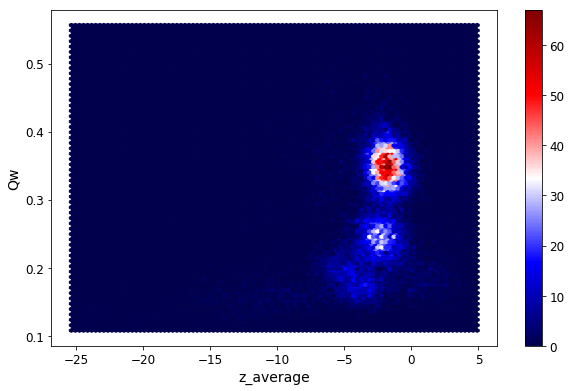

In [87]:
t_pos.plot.hexbin("z_average", "Qw", cmap="seismic", sharex=False)

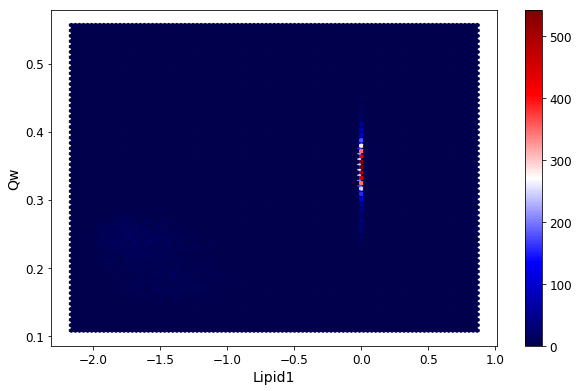

In [88]:
t_pos.plot.hexbin("Lipid1", "Qw", cmap="seismic", sharex=False)

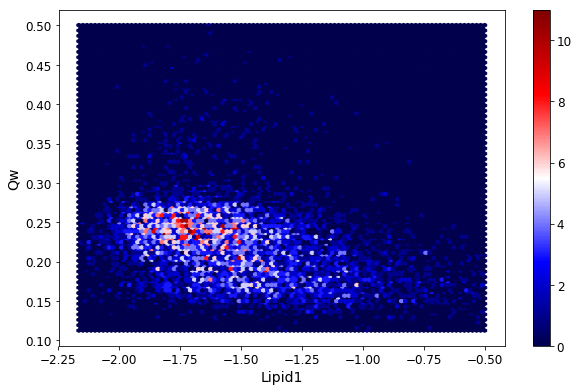

In [90]:
t_pos.query("Lipid1 < -0.5").plot.hexbin("Lipid1", "Qw", cmap="seismic", sharex=False)

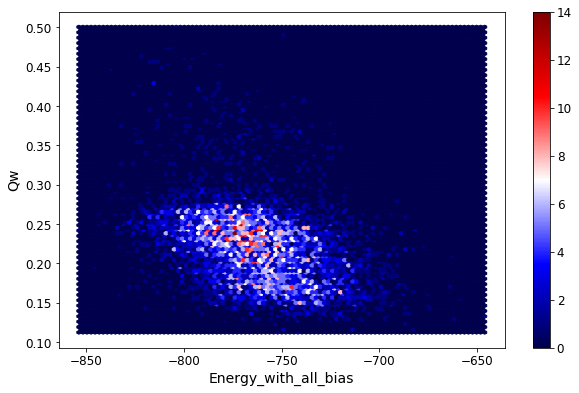

In [92]:
t_pos.query("Lipid1 < -0.5").plot.hexbin("Energy_with_all_bias", "Qw", cmap="seismic", sharex=False)

In [98]:
t_pos.query("Lipid1 < -0.5 and z_average < -4").sort_values("Energy_with_all_bias").head(n=10)["z_average"]

706769    -4.411739
739437    -4.677910
709840    -4.129936
1060008   -5.584049
1093669   -4.351164
1012509   -4.085650
1123500   -5.016386
1060532   -6.330104
1125877   -4.989070
1060480   -5.000276
Name: z_average, dtype: float64

In [ ]:
t_pos.query("Lipid1 < -0.5 and z_average < -4").sort_values("Energy_with_all_bias")

In [138]:
t_pos.query("z_average < -4").sort_values("AMH_4H").head(n=10)

,level_0,AMH,AMH-Go,AMH_3H,AMH_4H,BiasTo,DisReal,Dis_h56,Distance,Energy,...,z_average,z_h1,z_h2,z_h3,z_h4,z_h5,z_h6,BiasedEnergy,BiasEnergy,Energy_with_all_bias
1126273,446273,-218.375632,-437.165472,-295.945947,-355.891479,80.0,65.790700,62.497227,-55.052450,-719.666303,...,-7.767960,-0.742286,-6.063817,-6.246092,-10.192611,-16.107114,-18.833197,-537.935705,4.038084,-533.897621
1125849,445849,-218.177119,-431.653287,-298.179687,-354.934807,80.0,65.065334,53.971524,-50.825090,-706.837964,...,-9.413110,-0.849681,-7.509167,-7.642640,-11.495064,-22.853939,-26.234604,-532.652897,4.460885,-528.192012
1067216,387216,-216.679415,-425.721697,-292.856272,-350.828395,76.0,68.253689,43.873366,23.764883,-717.941721,...,-6.716317,-0.461650,-5.590795,-5.203010,-9.972778,-14.301081,-26.770710,-535.653821,1.200107,-534.453714
1126133,446133,-213.112447,-439.145305,-289.273137,-347.660227,80.0,67.062016,57.472450,-47.939616,-738.877963,...,-5.763330,-3.748541,-8.568946,-3.402772,-11.275554,-8.917268,-18.321435,-544.521828,3.347829,-541.173999
1126101,446101,-211.480423,-442.463754,-286.204801,-345.759750,80.0,66.936457,50.557520,-64.268538,-733.547034,...,-4.976259,-1.394228,-6.643697,-4.078782,-9.780926,-9.066586,-15.639029,-550.266247,3.413123,-546.853124
706769,26769,-212.502047,-432.283242,-284.108653,-345.343903,76.0,69.887765,63.889698,60.153880,-762.170015,...,-4.411739,-1.505991,-6.577402,-3.687029,-10.050159,-10.331140,-15.308807,-537.751250,0.747188,-537.004061
706861,26861,-215.737067,-422.403880,-289.170966,-345.337835,76.0,66.815424,72.045591,54.222840,-690.435599,...,-5.547676,-0.592264,-6.868703,-5.508089,-10.873647,-7.458156,-16.465050,-529.994269,1.687129,-528.307140
1068904,388904,-221.503388,-436.726296,-291.605144,-345.176318,76.0,65.741900,45.936472,-55.943603,-741.000204,...,-5.869313,-2.672310,-6.559123,-6.108043,-10.470321,-8.651620,-19.190212,-544.426074,2.104572,-542.321502
707049,27049,-211.259988,-429.056623,-288.146556,-344.858163,76.0,67.429033,38.711934,54.304548,-704.662968,...,-6.145018,-1.765843,-6.806651,-6.149995,-10.130540,-8.774747,-18.825244,-532.794951,1.469230,-531.325722
1126153,446153,-218.924307,-434.669732,-290.140110,-343.611160,80.0,66.020107,53.977987,-60.667803,-721.806330,...,-5.440438,-0.303600,-7.152898,-5.623939,-10.568709,-12.964864,-15.789399,-535.204667,3.908748,-531.295918


In [139]:
t_pos.query("z_average < -4").sort_values("BiasedEnergy").head(n=10)

,level_0,AMH,AMH-Go,AMH_3H,AMH_4H,BiasTo,DisReal,Dis_h56,Distance,Energy,...,z_average,z_h1,z_h2,z_h3,z_h4,z_h5,z_h6,BiasedEnergy,BiasEnergy,Energy_with_all_bias
717013,37013,-184.821189,-454.752292,-257.960787,-321.510281,72.0,64.547573,25.192301,55.070622,-745.525301,...,-5.317478,-0.677545,-10.466153,-6.055538,-10.961284,-6.478105,-5.562260,-557.292471,1.110773,-556.181697
715996,35996,-192.483234,-452.971870,-260.330769,-322.082205,72.0,67.064870,24.807108,50.403206,-711.212103,...,-4.130182,1.260293,-11.112324,-6.063463,-12.594077,-11.839025,-7.879270,-555.861394,0.487110,-555.374284
899947,219947,-182.435981,-447.984790,-256.753479,-321.780414,74.0,66.942706,26.704031,-65.166301,-729.291099,...,-4.567757,-1.445567,-7.965119,-3.471961,-10.597827,-9.456817,-5.981019,-553.639176,0.996108,-552.643068
1126101,446101,-211.480423,-442.463754,-286.204801,-345.759750,80.0,66.936457,50.557520,-64.268538,-733.547034,...,-4.976259,-1.394228,-6.643697,-4.078782,-9.780926,-9.066586,-15.639029,-550.266247,3.413123,-546.853124
981429,301429,-184.372016,-444.186864,-251.549499,-311.673000,64.0,66.886782,21.113763,58.218896,-738.111443,...,-4.479701,-4.108172,-6.707405,-6.369209,-9.742018,-6.940032,-5.918885,-546.233613,0.166670,-546.066942
898173,218173,-184.787413,-443.305889,-256.907756,-313.972940,74.0,65.386871,23.673697,58.521074,-736.644738,...,-4.362766,-1.923334,-10.804873,-4.647711,-10.420182,-9.520949,-4.127454,-544.858784,1.483720,-543.375064
1126133,446133,-213.112447,-439.145305,-289.273137,-347.660227,80.0,67.062016,57.472450,-47.939616,-738.877963,...,-5.763330,-3.748541,-8.568946,-3.402772,-11.275554,-8.917268,-18.321435,-544.521828,3.347829,-541.173999
1068904,388904,-221.503388,-436.726296,-291.605144,-345.176318,76.0,65.741900,45.936472,-55.943603,-741.000204,...,-5.869313,-2.672310,-6.559123,-6.108043,-10.470321,-8.651620,-19.190212,-544.426074,2.104572,-542.321502
1173548,493548,-185.265449,-443.647653,-252.216356,-313.877744,62.0,64.941020,23.171403,62.723999,-698.580721,...,-4.182046,0.688321,-11.117311,-4.146008,-11.009482,-8.317644,-6.230584,-543.783287,0.172992,-543.610295
1075412,395412,-175.813211,-443.149054,-245.412530,-309.455651,72.0,64.761869,24.170295,-5.002363,-739.255565,...,-4.615607,-2.501809,-9.223600,-3.682824,-9.812103,-7.694580,-5.017458,-543.534173,1.047811,-542.486363


In [ ]:
t_pos["Energy_with_all_bias"] = t["Lipid"] + t["Rg"] + t["Membrane"] + t["AMH-Go"]

In [122]:
t_pos.columns

Index(['level_0', 'AMH', 'AMH-Go', 'AMH_3H', 'AMH_4H', 'BiasTo', 'DisReal',
       'Dis_h56', 'Distance', 'Energy', 'Lipid', 'Lipid1', 'Lipid10',
       'Lipid11', 'Lipid12', 'Lipid13', 'Lipid14', 'Lipid15', 'Lipid2',
       'Lipid3', 'Lipid4', 'Lipid5', 'Lipid6', 'Lipid7', 'Lipid8', 'Lipid9',
       'Membrane', 'Qw', 'Rg', 'Run', 'Step', 'Temp', 'TempT', 'TotalE',
       'abs_z_average', 'index', 'rg1', 'rg2', 'rg3', 'rg4', 'rg5', 'rg6',
       'rg_all', 'z_average', 'z_h1', 'z_h2', 'z_h3', 'z_h4', 'z_h5', 'z_h6',
       'BiasedEnergy', 'BiasEnergy', 'Energy_with_all_bias'],
      dtype='object')

In [115]:
t_pos.query("Lipid1 < -0.5 and z_average < -4").sort_values("Energy_with_all_bias").head(n=10)



,level_0,AMH,AMH-Go,AMH_3H,AMH_4H,BiasTo,DisReal,Dis_h56,Distance,Energy,...,z_average,z_h1,z_h2,z_h3,z_h4,z_h5,z_h6,BiasedEnergy,BiasEnergy,Energy_with_all_bias
706769,26769,-212.502047,-432.283242,-284.108653,-345.343903,76.0,69.887765,63.889698,60.153880,-762.170015,...,-4.411739,-1.505991,-6.577402,-3.687029,-10.050159,-10.331140,-15.308807,-838.006747,0.747188,-837.259559
739437,59437,-196.030115,-387.054015,-257.419911,-300.193306,70.0,68.915638,48.912577,-0.996450,-770.617953,...,-4.677910,1.688017,-8.503781,-22.746647,9.408182,-0.678420,-27.738414,-832.256738,0.023517,-832.233221
709840,29840,-199.024849,-408.722619,-265.652053,-317.687485,76.0,66.412493,48.923734,9.731951,-763.470920,...,-4.129936,0.161948,-6.968308,-4.509131,-7.866892,-11.967710,-17.647050,-833.872146,1.838406,-832.033740
1060008,380008,-205.177507,-410.711785,-272.345876,-319.908173,76.0,67.163034,55.193395,6.191250,-763.017734,...,-5.584049,-2.154063,-9.166598,-8.109790,-10.043909,-8.057730,-18.807800,-832.920760,1.561839,-831.358921
1093669,413669,-197.495777,-388.618359,-255.195028,-298.446911,70.0,64.979684,43.130653,-63.230556,-766.819052,...,-4.351164,-1.189091,-7.201623,-20.683600,3.730482,-0.608185,-21.278041,-828.359515,0.504072,-827.855444
1012509,332509,-196.531048,-395.716664,-248.078482,-291.601372,90.0,69.820594,25.900637,-46.896724,-772.067345,...,-4.085650,-0.925995,-7.186946,-20.912458,-9.351533,-1.412594,-6.199589,-835.941761,8.144169,-827.797593
1123500,443500,-197.078658,-407.761645,-249.470402,-292.499780,80.0,68.150903,23.497658,-31.948016,-763.937178,...,-5.016386,-0.737543,-5.703099,-21.721631,-9.948837,-3.943697,-6.441064,-828.303029,2.808022,-825.495007
1060532,380532,-218.381075,-415.740553,-272.046754,-320.986063,76.0,67.711041,45.171521,43.852187,-758.254947,...,-6.330104,-0.560204,-6.850070,-5.351418,-8.599004,-14.943284,-24.908974,-826.567362,1.374137,-825.193225
1125877,445877,-209.106105,-424.949267,-278.493055,-334.499184,80.0,69.209617,67.819513,-57.103592,-753.865733,...,-4.989070,-1.360069,-6.731906,-3.835646,-8.928388,-9.682420,-18.847038,-827.129819,2.328647,-824.801172
1060480,380480,-201.740818,-416.641561,-267.129982,-321.890984,76.0,65.268530,58.376447,51.630428,-754.389351,...,-5.000276,-1.071173,-9.341406,-1.744067,-10.372312,-11.079897,-14.759797,-826.404009,2.303289,-824.100720


In [117]:
t_pos.query("Lipid1 < -0.5 and z_average < -4").sort_values("Energy_with_all_bias").head(n=5).to_csv("/Users/weilu/Research/data/may28_post_lowE.csv")





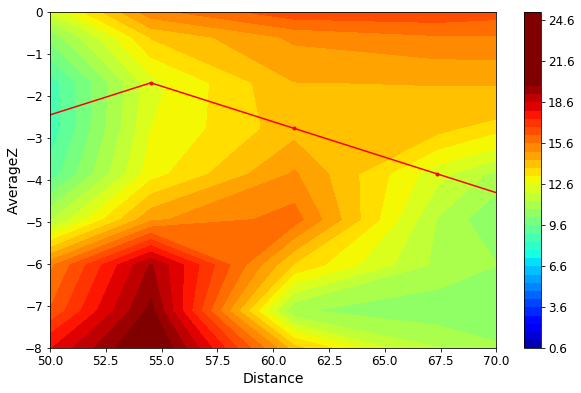

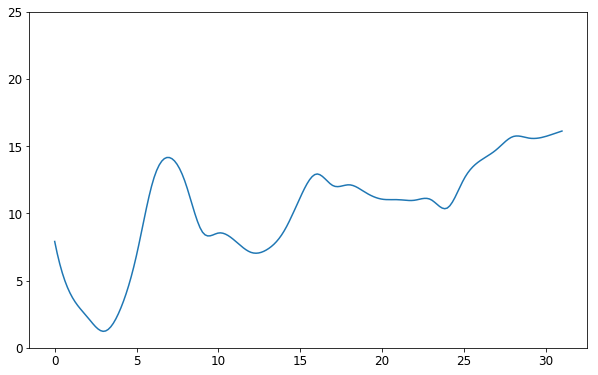

In [102]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/second_start_extended_combined_2/_280-350/2d_zAverage_dis/more_bins/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, start=(18, 30), end=(29,1),save=False, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

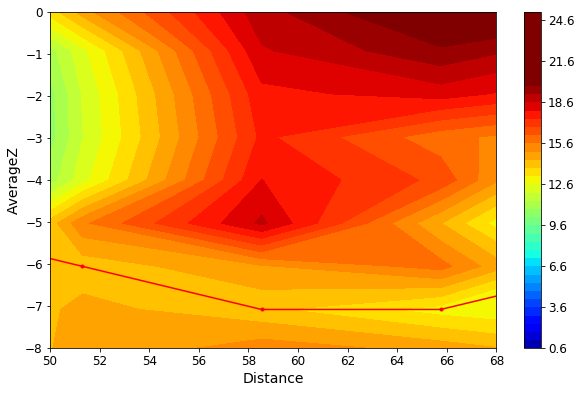

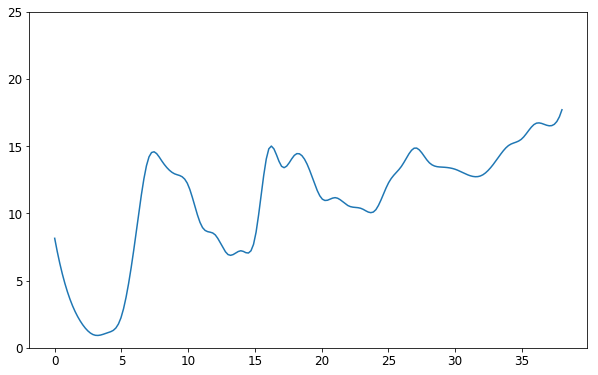

In [48]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/enhance_go/_280-350/2d_zAverage_dis/force_0.18/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, title="high_force_AverageZ_Dis", start=(10, 35), end=(28,1),save=False, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

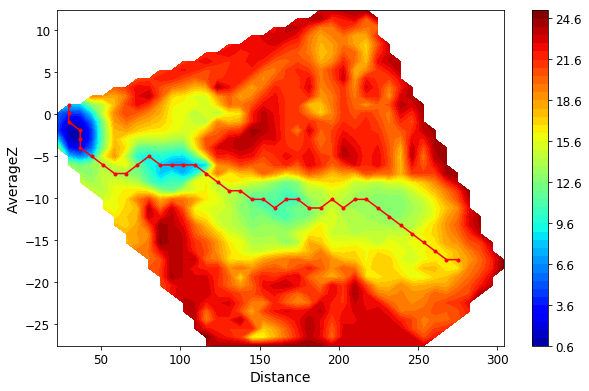

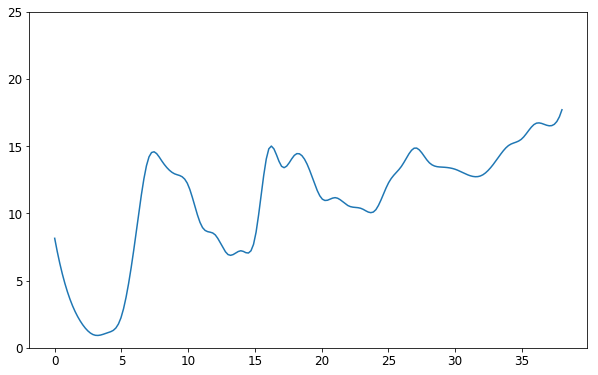

In [5]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/enhance_go/_280-350/2d_zAverage_dis/force_0.18/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, title="high_force_AverageZ_Dis", start=(10, 35), end=(28,1),save=True, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

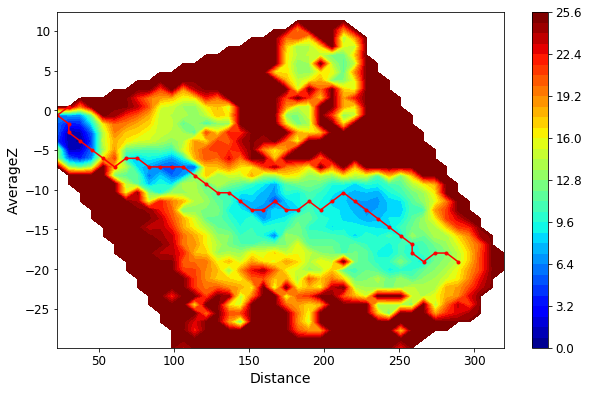

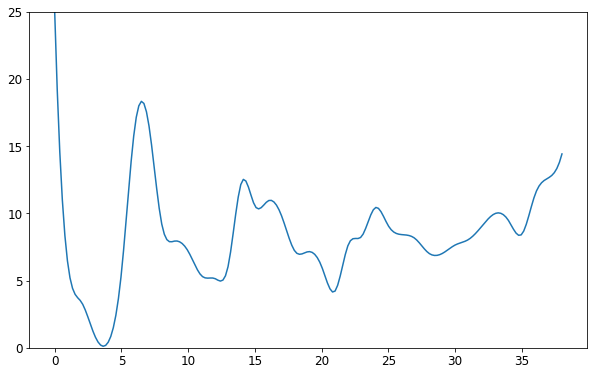

In [114]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/enhance_go/_280-350/2d_zAverage_dis/force_0.2/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, title="high_force_AverageZ_Dis", start=(10, 35), end=(28,1),save=True, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

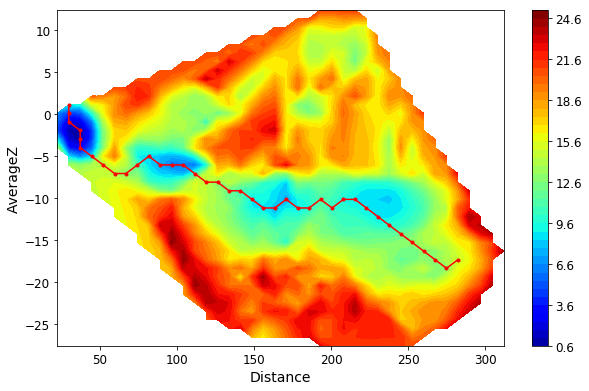

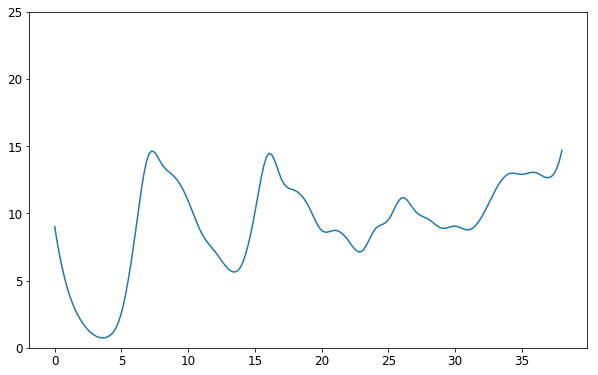

In [104]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/enhance_go/_280-350/2d_zAverage_dis/force_0.2/"
location2 = location + f"perturbation-10-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, title="high_force_AverageZ_Dis", start=(10, 35), end=(28,1),save=True, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

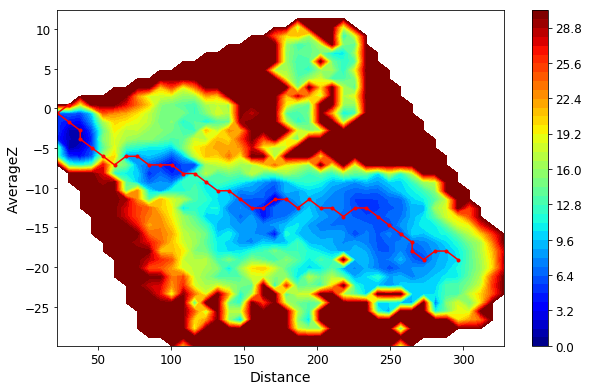

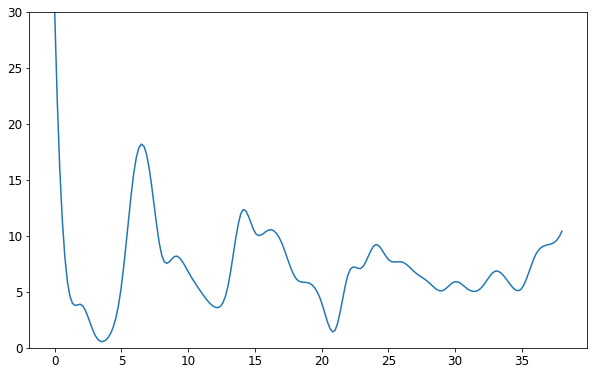

In [110]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/enhance_go/_280-350/2d_zAverage_dis/force_0.2/"
location2 = location + f"perturbation-9-pmf-{temp}.dat"
zmax=30
res=40
path_origin, f_origin = shortest_path_2(location2, title="high_force_AverageZ_Dis", start=(10, 35), end=(28,1),save=True, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

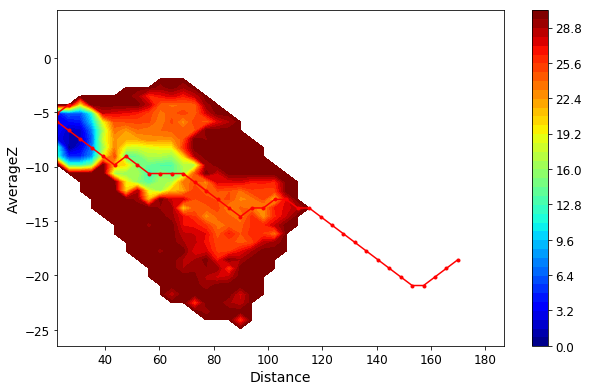

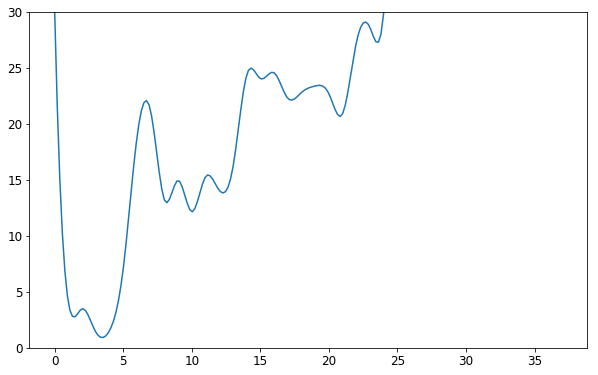

In [111]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/enhance_go/_280-350/2d_zAverage_dis/force_0.1/"
location2 = location + f"perturbation-9-pmf-{temp}.dat"
zmax=30
res=40
path_origin, f_origin = shortest_path_2(location2, title="high_force_AverageZ_Dis", start=(10, 35), end=(28,1),save=True, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

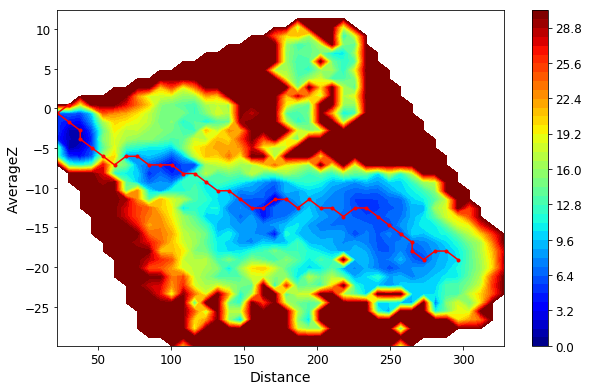

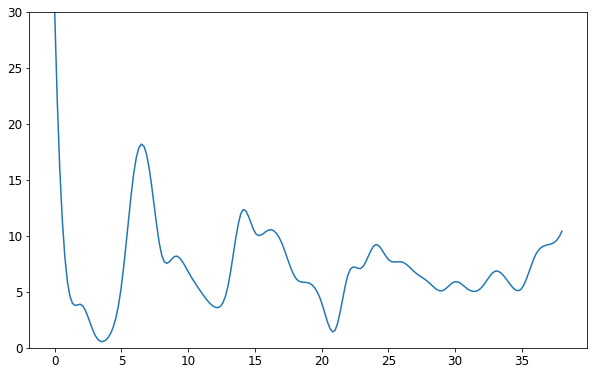

In [112]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/enhance_go/_280-350/2d_zAverage_dis/force_0.2/"
location2 = location + f"perturbation-9-pmf-{temp}.dat"
zmax=30
res=40
path_origin, f_origin = shortest_path_2(location2, title="high_force_AverageZ_Dis", start=(10, 35), end=(28,1),save=True, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

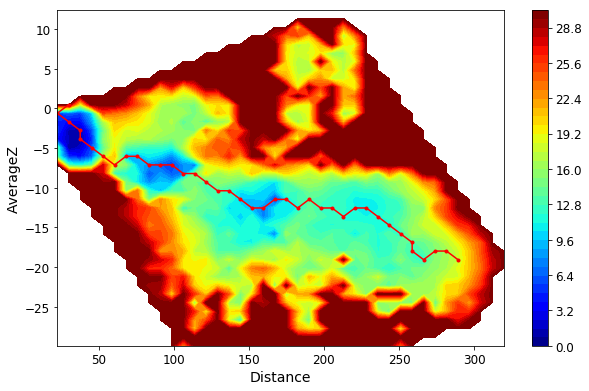

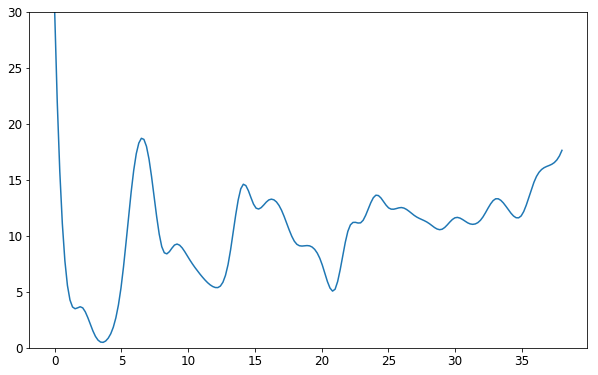

In [113]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/enhance_go/_280-350/2d_zAverage_dis/force_0.18/"
location2 = location + f"perturbation-9-pmf-{temp}.dat"
zmax=30
res=40
path_origin, f_origin = shortest_path_2(location2, title="high_force_AverageZ_Dis", start=(10, 35), end=(28,1),save=True, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)